# Pymaceuticals_starter

#Look across all previously generated figures and tables and write at least three observations or
#inferences that can be made from the data. Include these observations at the top of notebook.

merged data has to be cleaned before working on the data. In the mergered data i observed that not all drug trials on the mouse are done for 45 day for example n842 had only data for i day trial and Mice g989 has duplicate data for day 5, 10, 15 ets.
drug trials were equally distributed between male mice and female mice. capomulin seems to be the drug that is working on multiple mice. the final tumor volume for all mice using capomulin is reduced compare to day 1.

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import seaborn as sns
# import standard error of the mean (sem)
from scipy.stats import sem
from scipy import stats


In [2]:
# Study data files
mouse_metadata = "Resource/Mouse_metadata.csv"
study_results = "Resource/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

In [3]:
# Combine the data into a single dataset
combined_pharm_data = pd.merge(mouse_metadata_df, study_results_df,
                                 how='outer', on='Mouse ID')
combined_pharm_data = combined_pharm_data.rename(columns = {"Tumor Volume (mm3)":"Tumor_volume"})
drugs = combined_pharm_data['Drug Regimen'].unique()
sex = combined_pharm_data['Sex'].unique()
combined_pharm_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking for mice data that is wrong
combined_pharm_data['Mouse ID'].value_counts()

g989    13
w350    10
b742    10
k483    10
b559    10
        ..
x226     1
o848     1
l872     1
b447     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
dup_mice = combined_pharm_data.set_index('Mouse ID')
mouse = dup_mice.loc['g989', :]
mouse.head(15)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
#removing mouse id g989 for clean data
clean_pharm_data = dup_mice.drop(index = 'g989')
combined_pharm_data = clean_pharm_data.reset_index()
combined_pharm_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor = combined_pharm_data["Tumor_volume"]
mean_numpy = np.mean(Tumor)

median_numpy = np.median(Tumor)

var_numpy = np.var(Tumor,ddof = 0)

sd_numpy = np.std(Tumor,ddof = 0)

sample = combined_pharm_data.sample(30)

#Summary Statistics table
summary_table_df = pd.DataFrame({"Mean of tumor volume": [mean_numpy],
                                 "Median of tumor volume": [median_numpy],
                                 "Variance of tumor volume": [var_numpy],
                                 "Standard deviation of tumor volume": [sd_numpy],
                                  "SEM of the tumor volume": [sem(sample.Tumor_volume)]})
summary_table_df

,Mean of tumor volume,Median of tumor volume,Variance of tumor volume,Standard deviation of tumor volume,SEM of the tumor volume
0,50.435293,48.933454,79.42064,8.911826,1.636834


In [8]:
#calculating the drug regiment count
drug_count  = combined_pharm_data["Drug Regimen"].value_counts()

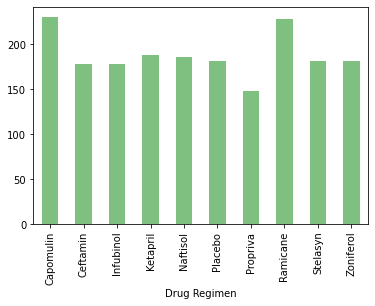

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_pharm_data.groupby("Drug Regimen").count().plot(kind='bar',color='green', legend=False,alpha=0.5, align="center")


# Bar plots

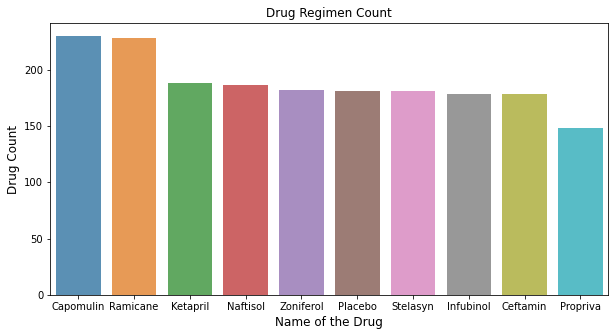

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,5))
sns.barplot(drug_count.index, drug_count.values, alpha=0.8)
plt.title('Drug Regimen Count')
plt.ylabel('Drug Count', fontsize=12)
plt.xlabel('Name of the Drug', fontsize=12)
plt.show()

# Pie plots

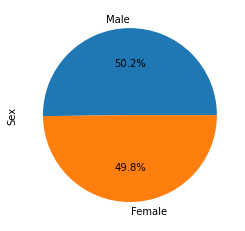

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = ["Male", "Female"]
y = mouse_metadata_df["Sex"].value_counts()
y.plot(kind='pie', autopct="%1.1f%%" )

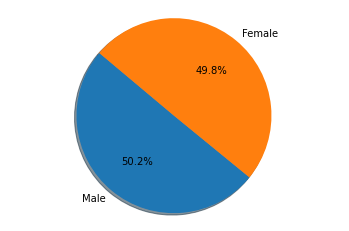

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(y , autopct="%1.1f%%", labels = sex, shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Quartiles, outliers and boxplots

In [13]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
mouse_id_max = combined_pharm_data.groupby(["Mouse ID"]).max()
mouse_id_max = mouse_id_max.reset_index()
clean_data_df = mouse_id_max[["Mouse ID","Timepoint"]].merge(combined_pharm_data,on = ["Mouse ID", "Timepoint"], how = 'left')
clean_data_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor_volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across 
#all four treatment regimens.

In [43]:
#capomulin drug on different mouse
capomulin = clean_data_df.loc[clean_data_df["Drug Regimen"]== "Capomulin"]
capomulin.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor_volume,Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [38]:
# Determine if there are any potential outliers in the Tumor volume of each mouse
capomulin = clean_data_df.loc[clean_data_df["Drug Regimen"]== "Capomulin"]["Tumor_volume"]
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_lowerq-cap_upperq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_outlier = capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]
cap_outlier

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor_volume, dtype: float64

In [16]:
# Determine if there are any potential outliers in the Tumor volume of each mouse
ramicane = clean_data_df.loc[clean_data_df["Drug Regimen"]== "Ramicane"]["Tumor_volume"]
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_lowerq-ram_upperq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_outlier = ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]
ram_outlier

6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor_volume, dtype: float64

In [17]:
infubinol = clean_data_df.loc[clean_data_df["Drug Regimen"]== "Infubinol"]["Tumor_volume"]
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_lowerq-inf_upperq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
inf_outlier = infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]
inf_outlier

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     36.321346
41     60.969711
50     62.435404
56     60.918767
78     67.289621
97     66.196912
101    62.117279
123    47.010364
129    60.165180
141    55.629428
142    45.699331
153    54.656549
170    55.650681
197    46.250112
200    54.048608
202    51.542431
211    50.005138
216    58.268442
233    67.685569
245    62.754451
Name: Tumor_volume, dtype: float64

In [18]:
ceftamin = clean_data_df.loc[clean_data_df["Drug Regimen"]== "Ceftamin"]["Tumor_volume"]
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_lowerq-cef_upperq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
cef_outlier = ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]
cef_outlier

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor_volume, dtype: float64

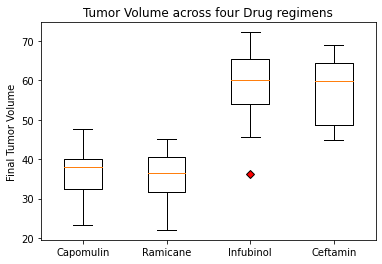

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot([capomulin,ramicane,infubinol,ceftamin], labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=red_diamond)
plt.title("Tumor Volume across four Drug regimens")
plt.ylabel("Final Tumor Volume")
plt.show()

# Line and scatter plots

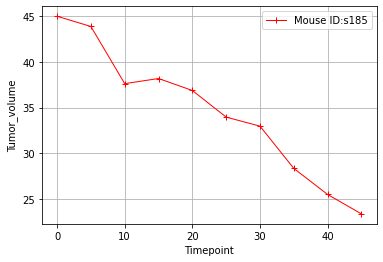

In [20]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
capomulin = combined_pharm_data.loc[combined_pharm_data["Drug Regimen"]== "Capomulin"]
Mouse_ID = capomulin.loc[capomulin["Mouse ID"] == 's185']
Timepoint = Mouse_ID["Timepoint"]
Tumor_volume = Mouse_ID["Tumor_volume"]
Mouse_s185 = plt.plot(Timepoint, Tumor_volume, marker="+",color="red", linewidth=1, label="Mouse ID:s185")
# Set our legend to where the chart thinks is best
plt.legend(loc="best")
# Create labels for the X and Y axis
plt.xlabel("Timepoint")
plt.ylabel("Tumor_volume")
plt.grid(True)
plt.show()

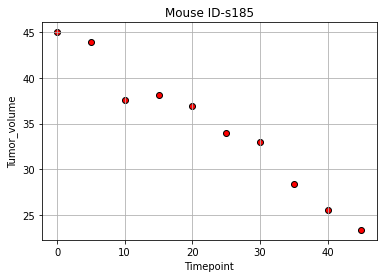

In [21]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
plt.scatter(Timepoint, Tumor_volume, marker="o", facecolors="red", edgecolors="black")
plt.title("Mouse ID-s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor_volume")
plt.grid(True)
plt.show()

# Correlation coefficient and Linear regression

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulin = combined_pharm_data.loc[combined_pharm_data["Drug Regimen"]== "Capomulin"]
capomulin_stats_df = capomulin.groupby(["Mouse ID"])
mouse_wtg_c = capomulin_stats_df["Weight (g)"].mean()
tumor_volume_c = capomulin_stats_df["Tumor_volume"].mean()
tumor_volume_c

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor_volume, dtype: float64

In [23]:
#Calculate the correlation coefficient 
correlation = sts.pearsonr(mouse_wtg_c,tumor_volume_c)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [24]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(mouse_wtg_c, tumor_volume_c)

# Get regression values
regress_values = mouse_wtg_c * slope + intercept
print(regress_values)

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


In [25]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


The r-squared is: 0.7088568047708717


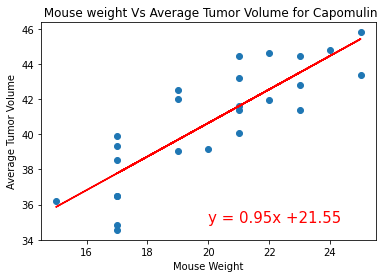

In [36]:
# Create Plot
plt.scatter(mouse_wtg_c, tumor_volume_c)
plt.plot(mouse_wtg_c,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(" Mouse weight Vs Average Tumor Volume for Capomulin")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
# Show plot
plt.show()